<a href="https://colab.research.google.com/github/azimhims/azimhims/blob/main/Copy_of_Welcome_To_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, BatchNormalization, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [ ]:
root_dir = '/content/drive/MyDrive/family/family'
import pathlib
data_dir = pathlib.Path(root_dir)
data_dir


PosixPath('/content/drive/MyDrive/family/family')

In [ ]:
list(data_dir.glob('*/*.jpg'))[:10]

[PosixPath('/content/drive/MyDrive/family/family/5/501.jpg'),
 PosixPath('/content/drive/MyDrive/family/family/5/502.jpg'),
 PosixPath('/content/drive/MyDrive/family/family/5/505.jpg'),
 PosixPath('/content/drive/MyDrive/family/family/5/503.jpg'),
 PosixPath('/content/drive/MyDrive/family/family/5/504.jpg'),
 PosixPath('/content/drive/MyDrive/family/family/5/506.jpg'),
 PosixPath('/content/drive/MyDrive/family/family/5/507.jpg'),
 PosixPath('/content/drive/MyDrive/family/family/5/508.jpg'),
 PosixPath('/content/drive/MyDrive/family/family/5/509.jpg'),
 PosixPath('/content/drive/MyDrive/family/family/5/511.jpg')]

In [ ]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

142


In [ ]:
aroush = list(data_dir.glob('1/*'))

zainb = list(data_dir.glob('2/*'))
amal = list(data_dir.glob('3/*'))
taha = list(data_dir.glob('4/*'))
mahira = list(data_dir.glob('5/*'))

In [ ]:
family_images_dict = {
    'aroush': list(data_dir.glob('1/*')),
    'zainb': list(data_dir.glob('2/*')),
    'amal': list(data_dir.glob('3/*')),
    'taha': list(data_dir.glob('4/*')),
    'mahira': list(data_dir.glob('5/*')),
}

In [ ]:
str(family_images_dict['aroush'][0])

'/content/drive/MyDrive/family/family/1/102.jpg'

In [ ]:
import cv2
img = cv2.imread(str(family_images_dict['aroush'][4]))
img.shape

(960, 720, 3)

In [ ]:
cv2.resize(img,(180,180)).shape

(180, 180, 3)

In [ ]:
X, y = [], []

for family_name, images in family_images_dict.items():
  print(family_name)
  print(len(images))


aroush
15
zainb
15
amal
44
taha
37
mahira
31


In [ ]:
family_labels_dict = {
    'aroush': 0,
    'zainb': 1,
    'amal': 2,
    'taha': 3,
    'mahira': 4,
}

X, y = [], []

for family_name, images in family_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(180,180))
        X.append(resized_img)
        y.append(family_labels_dict[family_name])

In [ ]:
import numpy as np
X = np.array(X)
y = np.array(y)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.20, random_state=0)

In [ ]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [ ]:
import os
from PIL import  Image
import numpy as np


ValueError: Undefined shapes are not supported.

In [ ]:
from keras.applications.vgg16 import VGG16
from keras.applications.resnet50 import ResNet50

In [ ]:
conv_base = ResNet50(
    weights='imagenet',
    include_top = False,
    input_shape=(180,180,3)
)

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [ ]:
number_classes = 5

model = Sequential()
model.add(conv_base)
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(number_classes,activation='softmax'))

In [ ]:
conv_base.trainable = False

In [ ]:
# scaled_dir = '/content/drive/MyDrive/family/family'
# os.makedirs(scaled_dir, exist_ok=True)

# # Save the scaled images to the new directory
# for i, img in enumerate(X_train_scaled):
#     img_path = os.path.join(scaled_dir, f'img_{i}.jpg')
#     print(img_path)


/content/drive/MyDrive/family/family/img_0.jpg
/content/drive/MyDrive/family/family/img_1.jpg
/content/drive/MyDrive/family/family/img_2.jpg
/content/drive/MyDrive/family/family/img_3.jpg
/content/drive/MyDrive/family/family/img_4.jpg
/content/drive/MyDrive/family/family/img_5.jpg
/content/drive/MyDrive/family/family/img_6.jpg
/content/drive/MyDrive/family/family/img_7.jpg
/content/drive/MyDrive/family/family/img_8.jpg
/content/drive/MyDrive/family/family/img_9.jpg
/content/drive/MyDrive/family/family/img_10.jpg
/content/drive/MyDrive/family/family/img_11.jpg
/content/drive/MyDrive/family/family/img_12.jpg
/content/drive/MyDrive/family/family/img_13.jpg
/content/drive/MyDrive/family/family/img_14.jpg
/content/drive/MyDrive/family/family/img_15.jpg
/content/drive/MyDrive/family/family/img_16.jpg
/content/drive/MyDrive/family/family/img_17.jpg
/content/drive/MyDrive/family/family/img_18.jpg
/content/drive/MyDrive/family/family/img_19.jpg
/content/drive/MyDrive/family/family/img_20.jpg
/c

In [ ]:
# train_ds = keras.utils.image_dataset_from_directory(
#     directory=scaled_dir,
#     labels='inferred',
#     label_mode='int',
#     batch_size=32,
#     image_size=(150,150)
# )
# validation_ds = keras.utils.image_dataset_from_directory(
#     directory = scaled_dir,
#     labels='inferred',
#     label_mode = 'int',
#     batch_size=32,
#     image_size=(150,150)
# )



Found 142 files belonging to 5 classes.
Found 142 files belonging to 5 classes.


In [ ]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
print(f"X_train shape: {X_train_scaled.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test_scaled.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (113, 180, 180, 3)
y_train shape: (113,)
X_test shape: (29, 180, 180, 3)
y_test shape: (29,)


In [ ]:
history = model.fit(X_train_scaled, y_train, epochs=10, batch_size=3)


Epoch 1/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 7s 119ms/step - accuracy: 0.8540 - loss: 1.7178
Epoch 2/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.3142 - loss: 4.2426
Epoch 3/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.4567 - loss: 2.0180
Epoch 4/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.5716 - loss: 1.0303
Epoch 5/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.5007 - loss: 1.0518
Epoch 6/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.5670 - loss: 0.9679
Epoch 7/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.5743 - loss: 0.9384
Epoch 8/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.5849 - loss: 0.8300
Epoch 9/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.4769 - loss: 0.9560
Epoch 10/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.5528 - loss: 1.1043


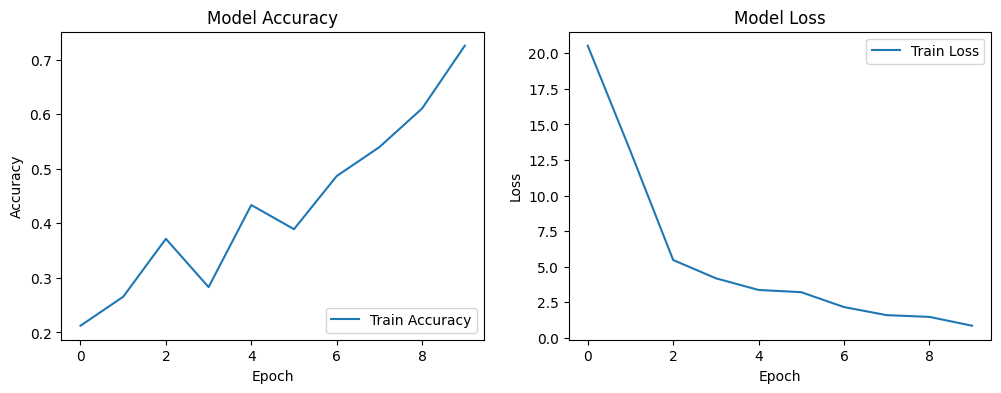

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))

# Plot training & validation accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
#plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
#plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')

plt.show()


In [ ]:
import cv2

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Predicted class: mahira
Prediction probabilities: [6.9203947e-05 9.8747878e-06 3.9687818e-03 3.6006775e-02 9.5994532e-01]


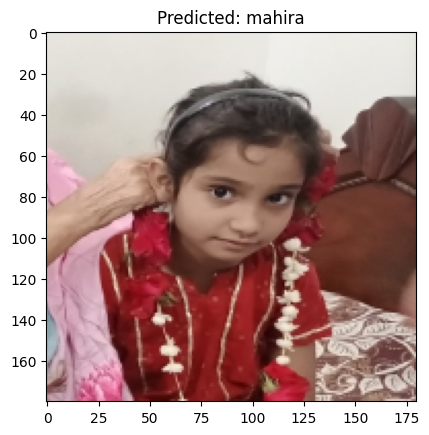

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Load the image
img_path = '/content/amal.jpg'  # Update with the path to your image
img = cv2.imread(img_path)

# Preprocess the image
img_resized = cv2.resize(img, (180, 180))  # Resize to the size used during training (150x150)
img_scaled = img_resized / 255.0  # Scale pixel values

# Convert the image to a batch (since the model expects batches of images)
img_array = np.expand_dims(img_scaled, axis=0)  # Shape becomes (1, 150, 150, 3)

# Predict the class
predictions = model.predict(img_array)

# Get the class with the highest probability
predicted_class_index = np.argmax(predictions[0])
predicted_class_name = list(family_labels_dict.keys())[predicted_class_index]

# Display the result
print(f"Predicted class: {predicted_class_name}")
print(f"Prediction probabilities: {predictions[0]}")

# Optionally, display the image
plt.imshow(cv2.cvtColor(img_resized, cv2.COLOR_BGR2RGB))
plt.title(f"Predicted: {predicted_class_name}")
plt.show()


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
conv_base.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 150, 150, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 150, 150, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 150, 150, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 75, 75, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 75, 75, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 75, 75, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 37, 37, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 37, 37, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 37, 37, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 37, 37, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 18, 18, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 18, 18, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 18, 18, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 18, 18, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 9, 9, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 9, 9, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 9, 9, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 9, 9, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 4, 4, 512)           │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model = Sequential()
model.add(conv_base)
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(5,activation='softmax'))

In [ ]:
conv_base.trainable = False

In [ ]:
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/drive/MyDrive/family/family/3',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(150,150)
)
validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/drive/MyDrive/family/family/3',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(150,150)
)

Found 0 files belonging to 0 classes.


ValueError: No images found in directory /content/drive/MyDrive/family/family/3. Allowed formats: ('.bmp', '.gif', '.jpeg', '.jpg', '.png')

In [ ]:
data_augmentation = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)


In [ ]:
train_dataset = data_augmentation.flow_from_directory(
    dataset_path,
    target_size=(256, 256),
    batch_size=32,
    class_mode='categorical'
)



Found 142 images belonging to 5 classes.


In [ ]:
normalization_layer = tf.keras.layers.Rescaling(1./255)



In [ ]:
print(tf.__version__)

2.17.0


In [ ]:
from tensorflow.keras.applications import ConvNext
from tensorflow.keras.layers import Layer, MultiHeadAttention, GlobalAveragePooling2D, Dense


ImportError: cannot import name 'ConvNext' from 'tensorflow.keras.applications' (/usr/local/lib/python3.10/dist-packages/keras/_tf_keras/keras/applications/__init__.py)

In [ ]:
from tensorflow.keras.applications import ConvNeXtLarge
from tensorflow.keras.applications import ConvNext
base_model = ConvNext.ConvNextLarge(weights='imagenet', include_top=False)
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = TransformerEncoder(num_heads=8, ff_dim=128, dropout_rate=0.1)(x)
x = Dense(10, activation='softmax')(x)
model = tf.keras.Model(inputs=base_model.input, outputs=x)




ImportError: cannot import name 'ConvNext' from 'tensorflow.keras.applications' (/usr/local/lib/python3.10/dist-packages/keras/_tf_keras/keras/applications/__init__.py)

In [ ]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications import ConvNeXtLarge



In [ ]:
keras.applications.ConvNeXtXLarge(
    include_top=True,
    include_preprocessing=True,
    weights="imagenet",
    input_tensor=None,
    input_shape=None,
    pooling=None,
    classes=1000,
    classifier_activation="softmax",
    name="convnext_xlarge",
)


1401457568/1401457568 ━━━━━━━━━━━━━━━━━━━━ 71s 0us/step


<Functional name=convnext_xlarge, built=True>

In [ ]:
base_model = ConvNeXtLarge(
    include_top=True,
    weights="imagenet",
    input_tensor=None,
    input_shape=None,
    pooling=None,
    classes=1000,
    classifie r_activation="softmax",

In [ ]:
base_model = ResNet50(weights='imagenet', include_top=False)
x = base_model.output
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = TransformerEncoder(num_heads=8, ff_dim=128, dropout_rate=0.1)(x)
x = tf.keras.layers.Dense(10, activation='softmax')(x)

model = tf.keras.Model(inputs=base_model.input, outputs=x)


94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


NameError: name 'TransformerEncoder' is not defined

In [ ]:
print(train_data)

In [ ]:
model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))
model.add(Conv2D(64,(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))
model.add(Conv2D(128,(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(5,activation='softmax'))

In [ ]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
batch_size = 16
train_steps = train_data.samples // batch_size
valid_steps = valid_data.samples // batch_size

In [ ]:
#batch_size = 32
history = model.fit(train_data,steps_per_epoch= train_steps, epochs=20,validation_data=valid_data, validation_steps=valid_steps)
#history = model.fit(train_generator,steps_per_epoch=train_steps,epochs=5,validation_data = valid_generator,


Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


8/8 ━━━━━━━━━━━━━━━━━━━━ 25s 2s/step - accuracy: 0.3550 - loss: 13.4882 - val_accuracy: 0.2606 - val_loss: 2.1573
Epoch 2/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 29s 772ms/step - accuracy: 0.5833 - loss: 4.9238 - val_accuracy: 0.1197 - val_loss: 2.9260
Epoch 3/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 10s 770ms/step - accuracy: 0.6880 - loss: 4.2472 - val_accuracy: 0.3310 - val_loss: 2.7056
Epoch 4/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 9s 453ms/step - accuracy: 0.7466 - loss: 3.4168 - val_accuracy: 0.2535 - val_loss: 3.9125
Epoch 5/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 9s 614ms/step - accuracy: 0.7956 - loss: 2.5815 - val_accuracy: 0.1831 - val_loss: 7.1222
Epoch 6/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 9s 451ms/step - accuracy: 0.7901 - loss: 3.8836 - val_accuracy: 0.1549 - val_loss: 13.1428
Epoch 7/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 9s 423ms/step - accuracy: 0.8188 - loss: 2.8758 - val_accuracy: 0.1197 - val_loss: 16.3298
Epoch 8/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 8s 520ms/step - accuracy: 0.8504 - loss: 2.2184 - val_accuracy: 0.1056 - val_loss: 19.9712

In [ ]:
from PIL import Image


In [ ]:
data = Image.open("/content/amal.jpg")

In [ ]:
new_image = data.resize((256,256))

In [ ]:
import numpy as np

In [ ]:
new_image_array = np.array(new_image)

In [ ]:
new_image_array = new_image_array/255.0

In [ ]:
new_image_array = np.expand_dims(new_image_array, axis=0)

# Transpose the array to match the expected input shape (None, 256, 256, 3)
new_image_array = np.transpose(new_image_array, (0, 2, 1, 3))

# Now you can feed the image into the model



In [ ]:

prediction = model.predict(new_image_array)

1/1 ━━━━━━━━━━━━━━━━━━━━ 27s 27s/step


In [ ]:
print(prediction)

[[6.8271656e-20 7.0605186e-25 1.3111503e-04 0.0000000e+00 9.9986887e-01]]
